#Monte Carlo Simulation for Call Option Price w/ Visualisation of paths. 

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


##Geometric Brownian Motion Formula

The stock price at time $t$ for stock modelled using Geometric Brownian Motion has the following simulated stock price at time $t$:


$$S_t = S_0 \, exp((\mu - \frac{\sigma^2}{2})t + \sigma \, W_t)$$

Where $W_t$ is a Wiener process


In [22]:
#Set relavent variables for GBM

S0 = 100
r = 0.05
sigma = 0.1
T = 1
N = 252 #trading days in a year 
dt = T/N
r = 0.05
paths = 100
k = 105


In [23]:
Z = np.random.standard_normal(size=(paths, N))

In [ ]:
#Calculate returns paths in logarithmic space
increments = (r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z
logS = np.cumsum(increments, axis=1)
logS = np.hstack([np.zeros((paths, 1)), logS])  
S_paths = S0 * np.exp(logS)

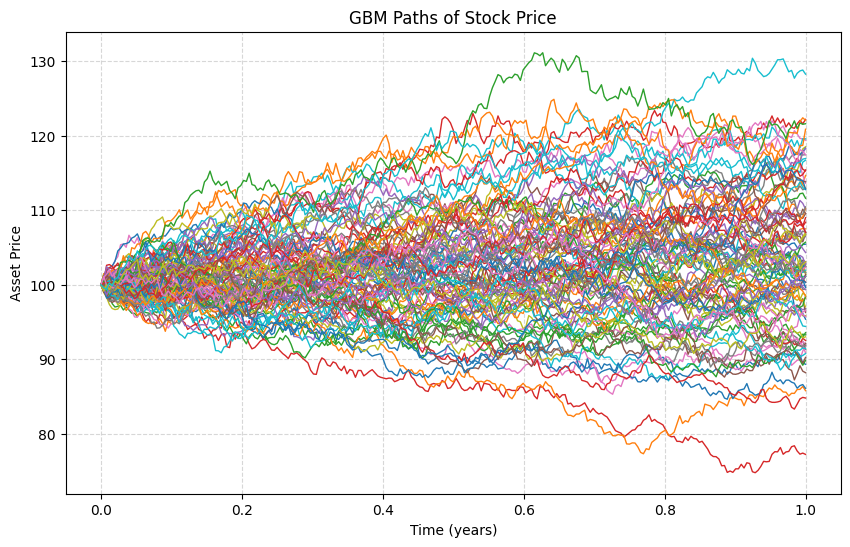

In [25]:
time_axis = np.linspace(0,1,N+1)

plt.figure(figsize=(10,6))


for i in range(paths):
    plt.plot(time_axis, S_paths[i], lw=1)

plt.title("GBM Paths of Stock Price")
plt.xlabel("Time (years)")
plt.ylabel("Asset Price")
plt.grid(True, linestyle = '--', alpha=0.5)
plt.show()

In [ ]:
#Calculate simulated option pay off
payoff = np.maximum(S_paths[:,-1] - k, 0)

In [ ]:
#Calculate estimated call option value
C0 = np.exp(-r * T) * np.mean(payoff)
print(C0)

np.float64(3.28102540547009)